# Assignment 2: Milestone I Natural Language Processing
## Task 2&3
#### Student Name: Shreyas Ainapur
#### Student ID: s3928704

Date: 25/09/2022

Version: 1.0

Environment: Python 3 and Jupyter notebook

## Introduction
- Firstly all the libraries that are to be used in this notebook is loaded
- Task 2 and Task 3 are addressed in this file
- In Task 2 three vector representations are generated. `Count Vectors` from bag of word model and `Unweighted Word2Vec` and `Weighted Word2Vec` from bag of embedding model
- `Weighted Word2Vec` is carried out using `tf-idf` features
- At the end of the Task 2 `count_vectors.txt` file is generated
- Task 3 is about building classification models
- Firstly, classification models are build on the vector representations that are generated in Task 2
- Followed by, three experiments are conducted to with the aim of building more robust model
- classification model using only job title, classification model using only job description, and classification model using both job title and job description

## Importing libraries 

In [1]:
# Code to import libraries as you need in this assessment, e.g.,
import pandas as pd
import numpy as np
from nltk import RegexpTokenizer
from nltk.tokenize import sent_tokenize
from itertools import chain
from gensim import utils
import gensim.models
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.datasets import load_files

## Task 2. Generating Feature Representations for Job Advertisement Descriptions

In [2]:
## loading the pre processed file performed in the Task 1
job_advertisementsFile = './job_advertisements.txt'
with open(job_advertisementsFile) as f: 
    tk_advertise = f.read().splitlines()
    
print(len(tk_advertise))
print(tk_advertise[11])

776
payroll process payroll european employees european payroll long term position payroll process payroll european employees position long term


In [3]:
## loading the vocab file created in the Task 1
## vocab is vocabulary file containing all the distinct words present in the tk_advertise with each word asssigned an 
## index value

vocabFile = './vocab.txt'
with open(vocabFile) as f: 
    lst_vocab = f.read().splitlines()

vocab = [lst_vocab[i].split(":")[0] for i in range(0,len(lst_vocab))]
print(len(vocab))

2767


### 2.1 Generating Count Vector Features

In [4]:
# Code to perform the task...
cVectorizer = CountVectorizer(analyzer = "word",vocabulary = vocab) # initialised the CountVectorizer
count_features = cVectorizer.fit_transform(tk_advertise)
print(count_features.shape)
print(count_features[0])

(776, 2767)
  (0, 23)	3
  (0, 26)	3
  (0, 593)	2
  (0, 640)	2
  (0, 835)	2
  (0, 1149)	2
  (0, 1428)	2
  (0, 1490)	2
  (0, 2370)	2


In [5]:
## vectorized form[using count vector] of tokenised data is represented in a data frame with columns as vocab
count_vect_df = pd.DataFrame(count_features.todense(), columns = vocab)
print(count_vect_df.shape)
print(count_vect_df.isna().sum().sum())
count_vect_df.head()

(776, 2767)
0


,aap,aaron,aat,abenefit,aberdeen,abi,abilities,abroad,absence,ac,...,xnone,xpo,xray,year,years,yn,york,yorkshire,youmust,young
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
## creating a list that stores sparse count vector representation from the obtained "count_features" in the above step
count_vector_lst = []
num = count_features.shape[0] # the number of document
for a_ind in range(0, num): # loop through each article by index
    count_vector_dict = {}
    for f_ind in count_features[a_ind].nonzero()[1]: # for each word index that has non-zero entry in the data_feature
        value = count_features[a_ind][0,f_ind] # retrieve the value of the entry from data_features
        count_vector_dict[str(f_ind)] = value
    count_vector_lst.append(count_vector_dict)

print(len(count_vector_lst))

776


### 2.2 Using Word2Vec pre-trained model to generate unweighted Vector Features

In [7]:
class MyCorpus:
    """An iterator that yields sentences (lists of str)."""
    def __init__(self, corpusFile):
        MyCorpus.fPath = corpusFile # specific the path to the corpus file
    def __iter__(self):
        for line in open(self.fPath):
            # assume there's one document per line, tokens separated by whitespace
            yield utils.simple_preprocess(line)

In [8]:
## crating a word embbeding model using "Word2Vec" model on the pre-processed text file "job_advertisements" from Task 1
sentences = MyCorpus('./job_advertisements.txt')
tkAdvertise_w2v = gensim.models.Word2Vec(sentences=sentences)

In [9]:
## extracting keyedvetors from the model
tkAdvertisew2v_wv = tkAdvertise_w2v.wv
tkAdvertisew2v_wv['south']

array([-0.15531625, -0.2351867 , -0.0579336 , -0.0085479 ,  0.09377784,
       -0.14340028, -0.01588136,  0.02289324,  0.08402606,  0.15732701,
       -0.04516051, -0.03820029, -0.21537825,  0.03019171, -0.06898353,
        0.05977045, -0.04742998,  0.1706923 ,  0.20197259, -0.133531  ,
        0.07817946,  0.15715657, -0.0149197 ,  0.00482079, -0.03367209,
        0.03310318,  0.03869916,  0.17185962,  0.02589963, -0.03164911,
        0.15084852, -0.21458314, -0.21667919,  0.04786747, -0.02979513,
        0.07241219,  0.21279411,  0.24640206,  0.05586395, -0.15350027,
       -0.10347877, -0.16610685,  0.09249999,  0.06735632, -0.07768138,
        0.02755861,  0.02239999,  0.01076849,  0.12112115, -0.00674303,
       -0.11260585,  0.11928556, -0.04175195,  0.06428879, -0.32916802,
       -0.04928318,  0.09468406,  0.18893313,  0.20798686, -0.04293314,
       -0.0254541 ,  0.0329534 , -0.08086585, -0.1549757 , -0.20134619,
        0.01397767, -0.00487239, -0.03534217, -0.07793107,  0.04

In [10]:
## defining a function for vector representation of documents
def gen_docVecs(wv,tk_txts): 
    docs_vectors = pd.DataFrame() # creating empty final dataframe
    
    for i in range(0,len(tk_txts)):
        tokens = tk_txts[i]
        temp = pd.DataFrame()  # creating a temporary dataframe(store value for 1st doc & for 2nd doc remove the details of 1st & proced through 2nd and so on..)
        for w_ind in range(0, len(tokens)): # looping through each word of a single document and spliting through space
            try:
                word = tokens[w_ind]
                word_vec = wv[word] # if word is present in embeddings(goole provides weights associate with words(300)) then proceed
                temp = temp.append(pd.Series(word_vec), ignore_index = True) # if word is present then append it to temporary dataframe
            except:
                pass
        doc_vector = temp.sum() # take the sum of each column
        docs_vectors = docs_vectors.append(doc_vector, ignore_index = True) # append each document value to the final dataframe
    return docs_vectors

In [11]:
## tokenising pre-processed text
tk_advertise_words = [sent.split(" ") for sent in tk_advertise]

In [12]:
## generating vector representation for documents 
preTW2v_tkAdvertise = gen_docVecs(tkAdvertisew2v_wv,tk_advertise_words)
print(preTW2v_tkAdvertise.shape)
print(preTW2v_tkAdvertise.isna().any().sum())
preTW2v_tkAdvertise

(776, 100)
100


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-5.068462,-7.824704,-1.972969,-0.242867,3.234148,-5.042603,-0.695948,0.719879,2.944647,5.142946,...,8.507458,1.008129,2.355509,2.499603,-0.965461,-2.068725,2.051052,-1.500132,-1.914441,4.163485
1,-2.423301,-3.685813,-0.911403,-0.085571,1.525872,-2.415663,-0.355994,0.350570,1.345616,2.442998,...,4.063135,0.500884,1.132757,1.221194,-0.406483,-0.963216,0.932996,-0.691190,-0.880015,2.010164
2,-4.825118,-7.602010,-1.965340,-0.146419,3.048032,-4.822064,-0.649525,0.597218,2.849778,4.982002,...,8.234884,1.011013,2.329142,2.387366,-0.951469,-1.996586,1.929596,-1.474224,-1.897024,4.042901
3,-0.161141,-0.267272,-0.063820,0.001343,0.111839,-0.169003,-0.030974,0.028954,0.091793,0.169894,...,0.289996,0.037896,0.083740,0.075677,-0.037813,-0.069247,0.071973,-0.044774,-0.070649,0.132989
4,-3.369248,-5.253254,-1.295704,-0.101764,2.144679,-3.359784,-0.437877,0.436255,1.941934,3.465617,...,5.689659,0.664964,1.608056,1.666920,-0.589917,-1.374844,1.339249,-1.043358,-1.292298,2.791828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,-2.713342,-4.207035,-1.079852,-0.076078,1.730345,-2.679002,-0.386803,0.360291,1.558208,2.759966,...,4.578032,0.553593,1.308264,1.358068,-0.508325,-1.156561,1.096788,-0.834561,-1.024315,2.234287
772,-23.250004,-35.886288,-9.193570,-0.928139,14.815231,-22.977522,-3.310085,3.083438,13.507675,23.462595,...,38.952282,4.568273,10.894816,11.492452,-4.353332,-9.474730,9.344268,-7.037651,-8.726354,18.950762
773,-28.789429,-44.635651,-11.474309,-1.118277,18.419367,-28.726595,-3.961606,3.726430,16.561983,29.421812,...,48.556313,5.911504,13.739857,14.199357,-5.418687,-11.823700,11.534088,-8.770804,-10.804869,23.906559
774,-6.038451,-9.505092,-2.449922,-0.280553,3.868682,-6.070223,-0.892608,0.811291,3.540301,6.239306,...,10.328991,1.215921,2.876082,2.968702,-1.121563,-2.526333,2.471732,-1.865158,-2.270898,5.062579


In [13]:
## extracting rows with null values in the DataFrame "preTW2v_tkAdvertise"
rows_NaN = preTW2v_tkAdvertise[preTW2v_tkAdvertise[0].isnull()]
rows_NaN

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
432,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
## storing the index posistions of the documents that is casuing the feature repesntation to have null values
missing_idx = list(rows_NaN.index)
missing_idx

[34, 51, 144, 196, 203, 295, 369, 403, 432, 497, 499, 542, 611, 621]

In [15]:
## total number of null values in the DataFrame
print("Total number of null values in the DataFrame 'preTW2v_tkAdvertise': "+str(preTW2v_tkAdvertise.isna().sum().sum()))

## finding the value in any two documents which is returned as a row with null values in the above DataFrame
print("Text in the pre-processed job_description file 'tk_advertise': "+tk_advertise[34])
print("Text in the pre-processed job_description file 'tk_advertise': "+tk_advertise[196])

Total number of null values in the DataFrame 'preTW2v_tkAdvertise': 1400
Text in the pre-processed job_description file 'tk_advertise': dry dry
Text in the pre-processed job_description file 'tk_advertise': 


- after pre-processing the corpus there are few documents which are empty or repetative word
- vector representation of these documents is returning null values
- thus these cannot be imputed nor has any value providng to the DataFrame and is to be removed

In [16]:
## remove rows with null values
preTW2v_tkAdvertise = preTW2v_tkAdvertise.dropna()
print(preTW2v_tkAdvertise.isna().sum().sum())
print(preTW2v_tkAdvertise.shape)

0
(762, 100)


- 14 documents had null values which are now removed

### 2.3 Using Word2Vec pre-trained model to generate weighted Vector Features

In [17]:
## creating tf-idf features of each word in vocab w.r.t the documents
tVectorizer = TfidfVectorizer(analyzer = "word",vocabulary = vocab) # initialised the TfidfVectorizer
tfidf_features = tVectorizer.fit_transform([' '.join(article) for article in tk_advertise_words]) # generate the tfidf vector representation for all articles
tfidf_features.shape

(776, 2767)

In [18]:
print(tfidf_features[1])

  (0, 1704)	0.17936362180652396
  (0, 1663)	0.23103005787614217
  (0, 1174)	0.23103005787614217
  (0, 1076)	0.23103005787614217
  (0, 1072)	0.8086052025664977
  (0, 25)	0.2732758939661363
  (0, 24)	0.2208935703515271
  (0, 23)	0.17432145875491875


In [19]:
## saving the "tfidf_features" in text format
def write_vectorFile(data_features,filename):
    num = data_features.shape[0] # the number of document
    out_file = open(filename, 'w') # creates a txt file and open to save the vector representation
    for a_ind in range(0, num): # loop through each article by index
        for f_ind in data_features[a_ind].nonzero()[1]: # for each word index that has non-zero entry in the data_feature
            value = data_features[a_ind][0,f_ind] # retrieve the value of the entry from data_features
            out_file.write("{}:{} ".format(f_ind,value)) # write the entry to the file in the format of word_index:value
        out_file.write('\n') # start a new line after each article
    out_file.close() # close the file
    
tVector_file = "./jobAdvertise_tVector.txt" # file name of the tfidf vector
write_vectorFile(tfidf_features,tVector_file) # write the tfidf vector to file

In [20]:
## defining a function to read the vocab text file and create a dictionary in the format "index:word"
def gen_vocIndex(voc_fname):
    with open(voc_fname) as vocf: 
        voc_Ind = [l.split(':') for l in vocf.read().splitlines()] # each line is 'index,word'
    return {int(vi[1]):vi[0] for vi in voc_Ind}


# Generates the w_index:word dictionary
voc_fname = './vocab.txt' # path for the vocabulary
voc_dict = gen_vocIndex(voc_fname)
print(len(voc_dict))

2767


In [21]:
def doc_wordweights(fName_tVectors, voc_dict):
    tfidf_weights = [] # a list to store the  word:weight dictionaries of documents
    num_idx =[] # a list containing idex positions of documents that are empty
    
    with open(fName_tVectors) as tVecf: 
        tVectors = tVecf.read().splitlines() # each line is a tfidf vector representation of a document in string format 'word_index:weight word_index:weight .......'
    for tv in tVectors: # for each tfidf document vector   
        try:
            tv = tv.strip()
            weights = tv.split(' ') # list of 'word_index:weight' entries
            weights = [w.split(':') for w in weights] # change the format of weight to a list of '[word_index,weight]' entries
            wordweight_dict = {voc_dict[int(w[0])]:w[1] for w in weights} # construct the weight dictionary, where each entry is 'word:weight'
            tfidf_weights.append(wordweight_dict)
        except:
            tfidf_weights.append({'NaN':'NaN'})
        
    return tfidf_weights

fName_tVectors = 'jobAdvertise_tVector.txt'
tfidf_weights = doc_wordweights(fName_tVectors, voc_dict)
print(len(tfidf_weights))
tfidf_weights

776


[{'south': '0.3153038371836532',
  'london': '0.2374743034302354',
  'ledger': '0.3264219711689295',
  'handling': '0.3686907152521719',
  'east': '0.3016963409276535',
  'credit': '0.3328469510256195',
  'control': '0.2450123946415029',
  'accounts': '0.36751859196225434',
  'accountant': '0.4525445113914803'},
 {'number': '0.17936362180652396',
  'nav': '0.23103005787614217',
  'hedge': '0.23103005787614217',
  'funds': '0.23103005787614217',
  'fund': '0.8086052025664977',
  'accounting': '0.2732758939661363',
  'accountants': '0.2208935703515271',
  'accountant': '0.17432145875491875'},
 {'running': '0.36623326900327413',
  'responsibility': '0.2942393127162493',
  'residents': '0.30118623373209186',
  'registered': '0.5975346881534561',
  'day': '0.23635569057635827',
  'assist': '0.2942393127162493',
  'absence': '0.4348502995003183'},
 {'trainee': '0.49974361289587954',
  'trading': '0.4339735527100274',
  'brokers': '0.7496154193438194'},
 {'users': '0.24916392953071625',
  'te

In [22]:
## defining a function to create vector representation representation of words in each document using wieghted method
def gen_docVecs(wv,tk_txts,tfidf = []): # generate vector representation for documents
    docs_vectors = pd.DataFrame() # creating empty final dataframe
    #stopwords = nltk.corpus.stopwords.words('english') # removing stop words

    for i in range(0,len(tk_txts)):
        tokens = list(set(tk_txts[i])) # get the list of distinct words of the document

        temp = pd.DataFrame()  # creating a temporary dataframe(store value for 1st doc & for 2nd doc remove the details of 1st & proced through 2nd and so on..)
        for w_ind in range(0, len(tokens)): # looping through each word of a single document and spliting through space
            try:
                word = tokens[w_ind]
                word_vec = wv[word] # if word is present in embeddings then proceed

                if tfidf != []:
                    word_weight = float(tfidf[i][str(word)])
                else:
                    word_weight = 1
                temp = temp.append(pd.Series(word_vec*word_weight), ignore_index = True) # if word is present then append it to temporary dataframe
            except:
                pass
        doc_vector = temp.sum() # take the sum of each column(w0, w1, w2,........w300)
        docs_vectors = docs_vectors.append(doc_vector, ignore_index = True) # append each document value to the final dataframe
    return docs_vectors

weighted_preTW2v_dvs = gen_docVecs(tkAdvertisew2v_wv,tk_advertise_words,tfidf_weights)
print(weighted_preTW2v_dvs.shape)
print(weighted_preTW2v_dvs.isna().any().sum())
weighted_preTW2v_dvs

(776, 100)
100


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.702357,-1.084598,-0.273610,-0.033429,0.447889,-0.697637,-0.096502,0.100281,0.408255,0.712368,...,1.178434,0.140229,0.326558,0.346225,-0.134180,-0.287235,0.284261,-0.207518,-0.265996,0.576674
1,-0.238684,-0.363610,-0.089762,-0.008469,0.150042,-0.238632,-0.035658,0.034989,0.132315,0.240831,...,0.401241,0.049805,0.111692,0.120902,-0.039785,-0.095012,0.091719,-0.067850,-0.086335,0.198798
2,-0.640348,-1.008767,-0.260209,-0.019378,0.405212,-0.640196,-0.086437,0.078946,0.378182,0.661529,...,1.093161,0.133090,0.308805,0.316593,-0.125874,-0.264682,0.256211,-0.194941,-0.251482,0.535452
3,-0.034965,-0.057994,-0.013848,0.000291,0.024268,-0.036671,-0.006721,0.006283,0.019918,0.036865,...,0.062925,0.008223,0.018170,0.016421,-0.008205,-0.015026,0.015617,-0.009715,-0.015330,0.028857
4,-0.389785,-0.608022,-0.149642,-0.011871,0.248016,-0.388742,-0.050487,0.050355,0.224799,0.401258,...,0.658216,0.076666,0.186334,0.193688,-0.067880,-0.158926,0.154689,-0.120632,-0.149569,0.323256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,-0.453083,-0.703091,-0.180268,-0.012246,0.288981,-0.447444,-0.064656,0.060006,0.260033,0.460847,...,0.765318,0.092477,0.218931,0.227260,-0.085042,-0.193602,0.183832,-0.139798,-0.171833,0.373290
772,-1.232452,-1.902108,-0.488463,-0.048971,0.785391,-1.218604,-0.176198,0.163706,0.716018,1.243245,...,2.065026,0.241504,0.576824,0.608941,-0.230211,-0.502386,0.494927,-0.373099,-0.462608,1.005642
773,-1.144492,-1.774935,-0.456585,-0.044131,0.732564,-1.142762,-0.157758,0.148794,0.658406,1.171111,...,1.930678,0.234701,0.547055,0.565037,-0.215777,-0.470465,0.459221,-0.348824,-0.429378,0.950861
774,-0.549365,-0.866345,-0.223165,-0.025485,0.351726,-0.552633,-0.082572,0.074568,0.322085,0.567835,...,0.940846,0.110719,0.262437,0.270085,-0.102387,-0.230123,0.225526,-0.169955,-0.206400,0.460737


In [23]:
rows_NaN = weighted_preTW2v_dvs[weighted_preTW2v_dvs[0].isna()]
rows_NaN

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
432,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
## storing the index posistions of the documents that is casuing the feature repesntation to have null values
missing_idx = list(rows_NaN.index)
missing_idx

[34, 51, 144, 196, 203, 295, 369, 403, 432, 497, 499, 542, 611, 621]

In [25]:
## total number of null values in the DataFrame
print("Total number of null values in the DataFrame 'weighted_preTW2v_dvs': "+str(weighted_preTW2v_dvs.isna().sum().sum()))

## finding the value in any two documents which is returned as a row with null values in the above DataFrame
print("Text in the pre-processed job_description file 'tk_advertise': "+tk_advertise[34])
print("Text in the pre-processed job_description file 'tk_advertise': "+tk_advertise[196])

Total number of null values in the DataFrame 'weighted_preTW2v_dvs': 1400
Text in the pre-processed job_description file 'tk_advertise': dry dry
Text in the pre-processed job_description file 'tk_advertise': 


- after pre-processing the corpus there are few documents which are empty or repetative word
- vector representation of these documents is returning null values
- thus these cannot be imputed nor has any value providng to the DataFrame and is to be removed

In [26]:
## remove rows with null values
weighted_preTW2v_dvs = weighted_preTW2v_dvs.dropna()
print(weighted_preTW2v_dvs.isna().sum().sum())
print(weighted_preTW2v_dvs.shape)

0
(762, 100)


- 14 documents had null values which are now removed

### 2.4 Generating "count_vectors" text file

In [27]:
## loading the text documents
files = load_files(r"data")
print(len(files['target']))
print(files.target_names)

776
['Accounting_Finance', 'Engineering', 'Healthcare_Nursing', 'Sales']


In [28]:
## defining a function for the tokenization of the text files
## extracting title, webindex in lists
def TitleWebindex(job_advertise):

    ## convert the bytes-like object to python string
    advertise = job_advertise.decode('utf-8')     
    
    ## segament into sentences
    sentences = sent_tokenize(advertise)
    
    ## tokenize each sentence
    pattern = r"[a-zA-Z0-9]+(?:[-'][a-zA-Z0-9]+)?"
    
    ## using regex tokeniation is carried out
    tokenizer = RegexpTokenizer(pattern) 
    token_lists = [tokenizer.tokenize(sen) for sen in sentences]
    
    ## merging them into a list of tokens
    tokenised_advertise = list(chain.from_iterable(token_lists))
    
    ## finding the index position of description in the list and manipulating list[tokenised_advertise] such that only 
    ## description of job advertisement is extracted
    idx_title = tokenised_advertise.index('Title')
    idx_webindex = tokenised_advertise.index('Webindex')
    title = tokenised_advertise[idx_title+1]
    webindex = tokenised_advertise[idx_webindex+1]
        
    return title, webindex

In [29]:
job_advertise = files.data
tk_title = [TitleWebindex(job)[0] for job in job_advertise]
tk_webindex = [TitleWebindex(job)[1] for job in job_advertise]
print(len(tk_title))
print(len(tk_webindex))

776
776


- we have title, webindex, target_names in list
- relation between target_names and target:-
- 0 - 'Accounting_Finance'
- 1 - 'Engineering'
- 2 - 'Healthcare_Nursing'
- 3 - 'Sales'

In [30]:
## creating a data frame with following as the columns
df_corpus = pd.DataFrame()
df_corpus['Title'] = tk_title
df_corpus['Webindex'] = tk_webindex
df_corpus['tk_text'] = tk_advertise
df_corpus['tk_tokens'] = tk_advertise_words
df_corpus['Category'] = files.target
print(df_corpus.shape)
df_corpus.head()

(776, 5)


,Title,Webindex,tk_text,tk_tokens,Category
0,Finance,68997528,accountant south east london accountant south ...,"[accountant, south, east, london, accountant, ...",0
1,Fund,68063513,hedge funds fund accountant fund accounting nu...,"[hedge, funds, fund, accountant, fund, account...",0
2,Deputy,68700336,day day running assist registered responsibili...,"[day, day, running, assist, registered, respon...",2
3,Brokers,67996688,trainee brokers trading trainee brokers broker...,"[trainee, brokers, trading, trainee, brokers, ...",0
4,RGN,71803987,nurses swiis bonus bonus free free free free p...,"[nurses, swiis, bonus, bonus, free, free, free...",2


In [31]:
## saving the output
## creating text file "count_vectors" using vector representation done in 2.1
def write_countVector(df,lst,filename):
    num = df.shape[0] # the number of document
    out_file = open(filename, 'w') # creates a txt file and open to save the vector representation
    for a_ind in range(0, num): # loop through each article by index
        string = "#"+str(df['Webindex'][a_ind])
        for key in count_vector_lst[a_ind]:
            val = count_vector_lst[a_ind][key]
            string += ","+str(key)+":"+str(val)
        out_file.write(string) # write the entry to the file in the format of word_index:value
        out_file.write('\n') # start a new line after each article
    out_file.close() # close the file
    
count_vectors = "./count_vectors.txt" 
write_countVector(df_corpus,count_vector_lst,count_vectors)

## Task 3. Job Advertisement Classification

### 3.1 Classification model buidling on the feature representations obtained in 2.1,2.2, and 2.3
### 3.1.1 Machine learning model on count vector features

In [32]:
seed = 0 # set a seed to make sure the experiment is reproducible

In [33]:
# creating training and test split
X_train, X_test, y_train, y_test,train_indices,test_indices = train_test_split(count_vect_df, df_corpus['Category'], 
                                                              list(range(0,len(df_corpus))),test_size=0.33,
                                                              random_state=seed)

model_cv = LogisticRegression(max_iter = 2000,random_state=seed)
model_cv.fit(X_train, y_train)
model_cv.score(X_test, y_test)

0.7821011673151751

In [34]:
## defining a function to plot the graph to view the vector representation
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
def plotTSNE(labels,features): # features as a numpy array, each element of the array is the document embedding of an article
    categories = sorted(labels.unique())
    # Sampling a subset of our dataset because t-SNE is computationally expensive
    SAMPLE_SIZE = int(len(features) * 0.3)
    np.random.seed(0)
    indices = np.random.choice(range(len(features)), size=SAMPLE_SIZE, replace=False)
    projected_features = TSNE(n_components=2, random_state=0).fit_transform(features[indices])
    colors = ['pink', 'green', 'midnightblue', 'orange', 'darkgrey']
    for i in range(0,len(categories)):
        points = projected_features[(labels[indices] == categories[i])]
        plt.scatter(points[:, 0], points[:, 1], s=30, c=colors[i], label=categories[i])
    plt.title("Feature vector for each article, projected on 2 dimensions.",
              fontdict=dict(fontsize=15))
    plt.legend()
    plt.show()

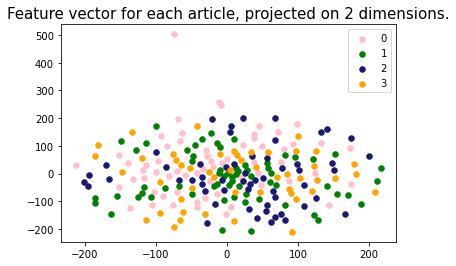

In [35]:
features = count_vect_df.to_numpy() # convert the document vector dataframe to a numpy array
plotTSNE(df_corpus['Category'],features) # plot the tSNE to have a look

### 3.1.2 Machine learning model on unweighted Word2Vec model

In [36]:
## documents at these index positions are removed
missing_idx

[34, 51, 144, 196, 203, 295, 369, 403, 432, 497, 499, 542, 611, 621]

In [37]:
## storing the labels[0,1,2,3] which are present in the "Category" column of DataFrame "df_corpus" and removing the ones
## occuring the the same index positions as in "missing_idx"
category = [df_corpus['Category'][i] for i in range(0,len(df_corpus)) if i not in missing_idx]
category = pd.Series(category)
print(len(category))

762


In [38]:
# creating training and test split
X_train, X_test, y_train, y_test = train_test_split(preTW2v_tkAdvertise, category, test_size=0.2,random_state=seed)
                                                                                                                          
model_unwt = LogisticRegression(max_iter = 1000,random_state=seed)
model_unwt.fit(X_train, y_train)
model_unwt.score(X_test, y_test)

0.7124183006535948

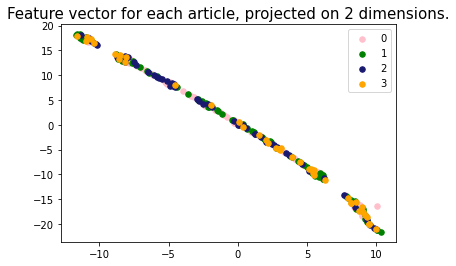

In [39]:
features = preTW2v_tkAdvertise.to_numpy() # convert the document vector dataframe to a numpy array
plotTSNE(category,features) # plot the tSNE to have a look

### 3.1.3 Machine learning model on weighted[tf_idf] Word2Vec model

In [40]:
# creating training and test split
X_train, X_test, y_train, y_test = train_test_split(weighted_preTW2v_dvs, category, test_size=0.2,random_state=seed)
                                                                                                                          
model_wt = LogisticRegression(max_iter = 1000,random_state=seed)
model_wt.fit(X_train, y_train)
model_wt.score(X_test, y_test)

0.4117647058823529

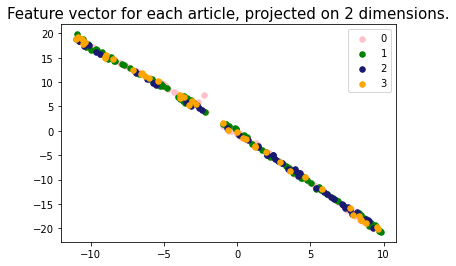

In [41]:
features = weighted_preTW2v_dvs.to_numpy() # convert the document vector dataframe to a numpy array
plotTSNE(category,features) # plot the tSNE to have a look

In [42]:
from sklearn.model_selection import KFold
num_folds = 5
kf = KFold(n_splits= num_folds, random_state=seed, shuffle = True) # initialise a 5 fold validation
print(kf)

KFold(n_splits=5, random_state=0, shuffle=True)


In [43]:
def evaluate(X_train,X_test,y_train, y_test,seed=0):
    model = LogisticRegression(random_state=seed,max_iter = 1000)
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [44]:
cv_df = []
emb_df = []
wgt_df = []

fold = 0
while fold < 5:
    
    X_train, X_test, y_train, y_test = train_test_split(count_vect_df, df_corpus['Category'],test_size=0.2,random_state=seed)                                                        
    ans = evaluate( X_train, X_test, y_train, y_test,seed)
    cv_df.append(ans)

    X_train, X_test, y_train, y_test = train_test_split(preTW2v_tkAdvertise, category, test_size=0.2,random_state=seed)
    ans = evaluate( X_train, X_test, y_train, y_test,seed)
    emb_df.append(str(ans))
    
    X_train, X_test, y_train, y_test = train_test_split(weighted_preTW2v_dvs, category, test_size=0.2,random_state=seed)
    ans = evaluate( X_train, X_test, y_train, y_test,seed)
    wgt_df.append(str(ans))
    
    fold +=1
    
## creating a DataFrame to store accuracy of each model on each iteration
acc_df = pd.DataFrame()
acc_df['CountVector'] = cv_df
acc_df['Unweighted_Word2Vec'] = emb_df
acc_df['Weighted_Word2Vec'] = wgt_df
acc_df

,CountVector,Unweighted_Word2Vec,Weighted_Word2Vec
0,0.769231,0.7124183006535948,0.4117647058823529
1,0.769231,0.7124183006535948,0.4117647058823529
2,0.769231,0.7124183006535948,0.4117647058823529
3,0.769231,0.7124183006535948,0.4117647058823529
4,0.769231,0.7124183006535948,0.4117647058823529


### 3.2 Classification Models

### 3.2.1 Classification model with only job title

In [45]:
## job title is stored in list "tk_title"
tk_title

['Finance',
 'Fund',
 'Deputy',
 'Brokers',
 'RGN',
 'Production',
 'Scrub',
 'Sales',
 'Recruitment',
 'Business',
 'Investments',
 'European',
 'Engineering',
 'International',
 'Senior',
 'Insurance',
 'Vehicle',
 'Marine',
 'Sales',
 'Optical',
 'PERM',
 'PERM',
 'Ecommerce',
 'Business',
 'Dynamics',
 'Nursing',
 'Registered',
 'Nurses',
 'Head',
 'Deputy',
 'Professional',
 'Assembler',
 'Recruitment',
 'Application',
 'Solderer',
 'Telesales',
 'Electronic',
 'Stress',
 'CNC',
 'Treasury',
 'Staff',
 'Clinical',
 'FT',
 'Care',
 'Senior',
 'French',
 'Community',
 'Senior',
 'Recruitment',
 'Lead',
 'Metal',
 'Flexible',
 'Carer',
 'Technical',
 'Claims',
 'Accounts',
 'Mobile',
 'Part',
 'Care',
 'Staff',
 'Graduate',
 'Play',
 'Business',
 'Audit',
 'GRADUATE',
 'Precise',
 'Control',
 'Asbestos',
 'Norwegian',
 'Service',
 'New',
 'Support',
 'European',
 'Senior',
 'Lead',
 'Housekeeper',
 'Configuration',
 'Commercial',
 'Peripatetic',
 'Press',
 'Entertainment',
 'Locum',


In [46]:
tk_title = [title.lower() for title in tk_title]

In [47]:
## creating a DataFrame to store job title and classes of the job advertisements under category column
df_model_1 = pd.DataFrame()
df_model_1['Title'] = tk_title
df_model_1['Category'] = files.target
df_model_1.head()

,Title,Category
0,finance,0
1,fund,0
2,deputy,2
3,brokers,0
4,rgn,2


In [48]:
## generating a vector representation of job title using "Count Vectors" 
CV_Title = cVectorizer.fit_transform(tk_title)

In [49]:
# creating training and test split
X_train, X_test, y_train, y_test = train_test_split(CV_Title, files.target, test_size=0.2, random_state=seed)                                                        

## building classification model using "LogisticRegression"
model_title = LogisticRegression(max_iter = 1000,random_state=seed)
model_title.fit(X_train, y_train)

## predicting the model accuracy
model_title.score(X_test, y_test)

0.46794871794871795

In [50]:
## initialising 5 fold validation
num_folds = 5
kf = KFold(n_splits= num_folds, random_state=seed, shuffle = True)
print(kf)

KFold(n_splits=5, random_state=0, shuffle=True)


In [51]:
## evaluating the model using 5-fold cross validation method
cv_title = []
fold = 0
for train_index, test_index in kf.split(list(range(0,len(files.target)))):
    y_train = [str(files.target[i]) for i in train_index]
    y_test = [str(files.target[i]) for i in test_index]

    X_train_count, X_test_count = CV_Title[train_index], CV_Title[test_index]
    ans = evaluate(CV_Title[train_index],CV_Title[test_index],y_train,y_test,seed)
    print("Accuarcy of the classification model using only job title for iteration "+str(fold)+" is "+str(ans))
    cv_title.append(ans)
    
    fold +=1
avg_acc = sum(cv_title)/len(cv_title)
print("Average accuracy of the model achieved on a 5-fold cross validation is "+str(avg_acc))

Accuarcy of the classification model using only job title for iteration 0 is 0.46794871794871795
Accuarcy of the classification model using only job title for iteration 1 is 0.5225806451612903
Accuarcy of the classification model using only job title for iteration 2 is 0.5032258064516129
Accuarcy of the classification model using only job title for iteration 3 is 0.5612903225806452
Accuarcy of the classification model using only job title for iteration 4 is 0.5290322580645161
Average accuracy of the model achieved on a 5-fold cross validation is 0.5168155500413565


- the average accuracy of the classification model when considered only the job title is `51.68%`
- the relation between model accuracy and iteration is non-linear
- it first increases then decreases and increases and agian decreases
- highest accuracy is achieved on the fourth iteration of the 5-fold cross validation which is `56.13%`

### 3.2.2 Classification model with only job description

- the model_cv is already generated in section `3.1.1`
- `model_cv` is the logistic regeression model when only job description is considered
- `model_cv` is generated using `Count Vectors`
- below is the 5-fold cross validation

In [52]:
## evaluating the model using 5-fold cross validation method
cv_desc = []
fold = 0
for train_index, test_index in kf.split(list(range(0,len(files.target)))):
    y_train = [str(files.target[i]) for i in train_index]
    y_test = [str(files.target[i]) for i in test_index]

    X_train_count, X_test_count = count_features[train_index], count_features[test_index]
    ans = evaluate(count_features[train_index],count_features[test_index],y_train,y_test,seed)
    print("Accuarcy of the classification model using only job description for iteration "+str(fold)+" is "+str(ans))
    cv_desc.append(ans)
    
    fold +=1
avg_acc = sum(cv_desc)/len(cv_desc)
print("Average accuracy of the model achieved on a 5-fold cross validation is "+str(avg_acc))

Accuarcy of the classification model using only job description for iteration 0 is 0.7692307692307693
Accuarcy of the classification model using only job description for iteration 1 is 0.7870967741935484
Accuarcy of the classification model using only job description for iteration 2 is 0.7290322580645161
Accuarcy of the classification model using only job description for iteration 3 is 0.7354838709677419
Accuarcy of the classification model using only job description for iteration 4 is 0.7741935483870968
Average accuracy of the model achieved on a 5-fold cross validation is 0.7590074441687344


- the average accuracy of the classification model when considered only the job description is `75.90%`
- the relation between model accuracy and iteration is non-linear
- it first increases then decreases and increases
- highest accuracy is achieved on the second iteration of the 5-fold cross validation which is `78.70%`

### 3.2.3 Classification model with both job description and job title

In [53]:
## concatenating job description and job title 
desc_title = [tk_advertise[i]+" "+tk_title[i] for i in range(0,len(tk_advertise))]

In [54]:
## generating vector representation using count vectors
cv_desc_title = cVectorizer.fit_transform(desc_title)

In [55]:
# creating training and test split
X_train, X_test, y_train, y_test = train_test_split(cv_desc_title, files.target, test_size=0.2, random_state=seed)                                                        

## building classification model using "LogisticRegression"
model_desc_title = LogisticRegression(max_iter = 1000,random_state=seed)
model_desc_title.fit(X_train, y_train)

## predicting the model accuracy
model_desc_title.score(X_test, y_test)

0.7756410256410257

In [56]:
## initialising 5 fold validation for model evaluation
num_folds = 5
kf = KFold(n_splits= num_folds, random_state=seed, shuffle = True)
print(kf)

KFold(n_splits=5, random_state=0, shuffle=True)


In [57]:
## evaluating the model using 5-fold cross validation method
acc_desc_title = []
fold = 0
for train_index, test_index in kf.split(list(range(0,len(files.target)))):
    y_train = [str(files.target[i]) for i in train_index]
    y_test = [str(files.target[i]) for i in test_index]

    X_train_count, X_test_count = cv_desc_title[train_index], cv_desc_title[test_index]
    ans = evaluate(cv_desc_title[train_index],cv_desc_title[test_index],y_train,y_test,seed)
    print("Accuarcy of the classification model using only job title for iteration "+str(fold)+" is "+str(ans))
    acc_desc_title.append(ans)
    
    fold +=1
avg_acc = sum(acc_desc_title)/len(acc_desc_title)
print("Average accuracy of the model achieved on a 5-fold cross validation is "+str(avg_acc))

Accuarcy of the classification model using only job title for iteration 0 is 0.7756410256410257
Accuarcy of the classification model using only job title for iteration 1 is 0.7935483870967742
Accuarcy of the classification model using only job title for iteration 2 is 0.7419354838709677
Accuarcy of the classification model using only job title for iteration 3 is 0.7548387096774194
Accuarcy of the classification model using only job title for iteration 4 is 0.7870967741935484
Average accuracy of the model achieved on a 5-fold cross validation is 0.7706120760959471


- the average accuracy of the classification model when considered only the job description is `77.06%`
- the relation between model accuracy and iteration is non-linear
- it first increases then decreases and increases
- highest accuracy is achieved on the second iteration of the 5-fold cross validation which is `79.35%`

## Summary
- In Task 2, `Count Vector` features are generated using the function `cVectorizer` and the vocabulary file `vocab`
- It gives the number of times each word in the vocab file has arrived in the document
- `Unweighted Word2Vec` is a model of word of embeding which first calculates vector representation of each word in a document. Then, summing up the these values gives the vector representation of that document
- When this model is converted into DataFrame the columns are the dimention of the vector. Here it is 100
- `Weighted Word2Vec` is also similar to `Unweighted Word2Vec` but this model also considers the weightage of each word and is obtained using tf-idf vectorizer
- In Task3, classification models on these three vector represntations are build
- Highest accuracy of the model is achieved by the "count vector" model which is `78.21%`, followed by "Unweighted Word2Vec" model `71.24%` and lowest accuracy is obtained by "Weighted Word2Vec" model which is `40.52%`
- Moreover, three experiments are conducted to build more robust model
- `LogisticRegeression` is used for building classification model and `5-fold cross-validation` method is used for the evaluation
- Firstly, classification model is built using only job title however, the model has very low accuracy. Even after performing 5-fold cross validation the highest acuracy is as high as `56.13%`
- Then, classification model is built using only job description. In this case highest accuracy achieved is `78.70%`
- Finally, classification model is built using both job title and job description and the highest accuracy obtained by the model is `79.53%`
#### After conducting these experiments, it is concluded that it is possible to increase model performance after including job title however, the increase in performance is not very significant. Thus, the feature job title is not a significant feature for the classification model